**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных.

# Загрузка набора данных

### Описание предметной области



Вариант 16

Набор данных: salary2.csv

Атрибуты:
1. Год выплаты заработной платы (целое число)
2. Тип работы (PT - Part-time, FT - Full-time,  FL - Freelance)
3. Должность
4. Зарплата за год (целое число)
5. Зарплата в долларах (целое число)
6. Страна проживания
7. Страна главного офиса
8. Среднее кол-во людей в компании (S - менее 50 сотрудников (малая), M от 50 до 250 сотрудников (средняя), L - более 250 сотрудников (крупная))
9. Общий опыт работы
10. Опыт на последней работе

### 1.Чтение файла (набора данных)

Было выполнено чтение файла скачанного датасета с помощью библиотеки pandas.

In [42]:
import pandas as pd
import numpy as np

file_path = 'salary2.csv'
df = pd.read_csv(file_path, sep=';') # используется разделитель ";", потому что оригинальный файл так разделен
df

,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp
0,2020.0,FT,Data SCIENTIST,70000.0,79833.0,DE,DE,L,9,4
1,2020.0,FT,Product Data Analyst,20000.0,20000.0,HN,HN,S,2,2
2,2020.0,FT,Data Analyst,72000.0,72000.0,US,US,L,13,3
3,2020.0,FT,Data Scientist,11000000.0,35735.0,HU,HU,L,60,6
4,2020.0,FT,Data Scientist,45000.0,51321.0,FR,FR,S,8,4
...,...,...,...,...,...,...,...,...,...,...
396,2022.0,FT,Data Engineer,126000.0,126000.0,US,US,M,20,5
397,2022.0,FT,Data Analyst,129000.0,129000.0,US,US,M,19,1
398,2022.0,FT,Data Analyst,150000.0,150000.0,US,US,M,20,4
399,2022.0,FT,Data Analyst,67000.0,67000.0,CA,CA,M,10,1


### 2. Обзор данных

2.1 Оценка данных с помощью метода info.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           401 non-null    float64
 1   employment_type     401 non-null    object 
 2   job_title           401 non-null    object 
 3   salary              398 non-null    float64
 4   salary_in_usd       401 non-null    float64
 5   employee_residence  401 non-null    object 
 6   company_location    401 non-null    object 
 7   company_size        401 non-null    object 
 8   exp_all             401 non-null    int64  
 9   exp                 401 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 31.5+ KB


В ходе анализа таблицы с помощью метода info были сделаны следующие выводы:


*   В таблице находится 10 столбцов и 401 строка.
*   Столбец salary содержит 3 пустых значения.
*   Используемые типы данных: int64, float64, object.

2.2 Оценка данных с помощью метода describe.

In [44]:
df.describe()

,work_year,salary,salary_in_usd,exp_all,exp
count,401.000000,3.980000e+02,401.000000,401.000000,401.000000
mean,2021.528678,2.888336e+05,105895.017456,17.197007,4.486284
std,0.678086,1.677081e+06,58183.664171,11.133445,2.027421
min,2020.000000,4.000000e+03,2859.000000,0.000000,-1.000000
25%,2021.000000,6.700000e+04,65013.000000,10.000000,3.000000
50%,2022.000000,1.091400e+05,100000.000000,15.000000,4.000000
75%,2022.000000,1.500000e+05,140000.000000,22.000000,6.000000
max,2022.000000,3.040000e+07,412000.000000,81.000000,10.000000


В ходе анализа таблицы с помощью метода describe были сделаны следующие выводы:


*   В столбце exp выявлена аномалия - минимальный опыт на последней работе -1 год.
*   В столбце exp_all выявлена аномалия - максимальный опыт 81 год.
*   В столбце salary значения выводятся в странном формате.

 2.3 Оценка названий столбцов

In [45]:
df.columns

Index(['work_year', 'employment_type', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'company_location', 'company_size', 'exp_all',
       'exp'],
      dtype='object')

In [46]:
df = df.rename(columns={'exp' : 'exp_last'})
df.columns

Index(['work_year', 'employment_type', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'company_location', 'company_size', 'exp_all',
       'exp_last'],
      dtype='object')

Для более полного отражения сути столбца было изменено название exp -> exp_last.

### 3. Проверка пропусков

In [47]:
print(df.isna().sum())

work_year             0
employment_type       0
job_title             0
salary                3
salary_in_usd         0
employee_residence    0
company_location      0
company_size          0
exp_all               0
exp_last              0
dtype: int64


Было принято решение удалить пропуски, поскольку 3 значения составляют менее 1% от общей информации по столбцу и их отсутствие несильно повлияет на анализ данных.

In [48]:
df = df.dropna(subset=['salary'])
print(df.isna().sum())

work_year             0
employment_type       0
job_title             0
salary                0
salary_in_usd         0
employee_residence    0
company_location      0
company_size          0
exp_all               0
exp_last              0
dtype: int64


### 4. Проверка дубликатов

#### Проверка явных дубликатов

In [49]:
print(df.duplicated().sum())
df[df.duplicated()]

0


,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp_last


Явные дубликаты обнаружены не были.

#### Проверка неявных дубликатов

In [50]:
print(df['employment_type'].unique())
print(df['job_title'].unique())
print(df['employee_residence'].unique())
print(df['company_location'].unique())
print(df['company_size'].unique())

['FT' 'PT' 'FL']
['Data SCIENTIST' 'Product Data Analyst' 'Data Analyst' 'Data Scientist'
 'Data Engineer' 'Machine Learning Manager' 'Data Analytics Engineer'
 'Data Science Engineer' 'Machine Learning Developer'
 'Data Analytics Manager' 'Head of Data Science'
 'Head of Machine Learning' 'NLP Engineer' 'Data Analytics Lead'
 'DataScientist' 'Data AnalyticsManager']
['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'PH'
 'GB' 'ES' 'IT' 'PL' 'BG' 'NL' 'IQ' 'UA' 'SG' 'RU' 'MT' 'CL' 'RO' 'IR'
 'VN' 'BR' 'HK' 'TR' 'RS' 'AR' 'DZ' 'AU' 'CH']
['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'GB'
 'ES' 'IT' 'LU' 'PL' 'NL' 'IQ' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'BR' 'VN'
 'TR' 'DZ' 'MY' 'AU' 'CH']
['L' 'S' 'M' 'Large']


В столбцах job_title и company_size были обнаружены различные варианты одной и той же должности (Data Scientist) и Large вместо L. Было принято решение заменить их.

In [51]:
df['job_title'] = df['job_title'].replace('Data SCIENTIST', 'Data Scientist')
df['job_title'] = df['job_title'].replace('DataScientist', 'Data Scientist')
df['job_title'] = df['job_title'].replace('Data AnalyticsManager', 'Data Analytics Manager')
df['company_size'] = df['company_size'].replace('Large', 'L')
print(df['job_title'].unique())
print(df['company_size'].unique())

['Data Scientist' 'Product Data Analyst' 'Data Analyst' 'Data Engineer'
 'Machine Learning Manager' 'Data Analytics Engineer'
 'Data Science Engineer' 'Machine Learning Developer'
 'Data Analytics Manager' 'Head of Data Science'
 'Head of Machine Learning' 'NLP Engineer' 'Data Analytics Lead']
['L' 'S' 'M']


### 5. Провека типов данных

При проверке типов данных было принято решение изменить тип в столбцах work_year, salary, salary_in_usd на int64, поскольку это является условием варианта.

In [52]:
print(df.dtypes)
df['work_year'] = df['work_year'].astype('int64')

work_year             float64
employment_type        object
job_title              object
salary                float64
salary_in_usd         float64
employee_residence     object
company_location       object
company_size           object
exp_all                 int64
exp_last                int64
dtype: object


В столбце salary было невозможно заменить тип данных из-за наличия значений типа NaN. Строки с данными значениями были заполнены нулями для предотвращения потери остальных данных.

In [53]:
import numpy as np
numeric_df = df.select_dtypes(include=np.number)
mask_nan_inf = numeric_df.isnull().any(axis=1) | np.isinf(numeric_df).any(axis=1)
rows_with_nan_or_inf = df[mask_nan_inf]
print(rows_with_nan_or_inf)

Empty DataFrame
Columns: [work_year, employment_type, job_title, salary, salary_in_usd, employee_residence, company_location, company_size, exp_all, exp_last]
Index: []


Тип данных был изменен для всех необходимых столбцов.

In [54]:
df = df.fillna(0)
df['salary'] = df['salary'].astype('int64')
df['salary_in_usd'] = df['salary_in_usd'].astype('int64')
print(df.dtypes)

work_year              int64
employment_type       object
job_title             object
salary                 int64
salary_in_usd          int64
employee_residence    object
company_location      object
company_size          object
exp_all                int64
exp_last               int64
dtype: object


### Построение точечной диаграммы (матрица диаграмм рассеяния) для всех признаков

array([[<Axes: xlabel='work_year', ylabel='work_year'>,
        <Axes: xlabel='salary', ylabel='work_year'>,
        <Axes: xlabel='salary_in_usd', ylabel='work_year'>,
        <Axes: xlabel='exp_all', ylabel='work_year'>,
        <Axes: xlabel='exp_last', ylabel='work_year'>],
       [<Axes: xlabel='work_year', ylabel='salary'>,
        <Axes: xlabel='salary', ylabel='salary'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary'>,
        <Axes: xlabel='exp_all', ylabel='salary'>,
        <Axes: xlabel='exp_last', ylabel='salary'>],
       [<Axes: xlabel='work_year', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <Axes: xlabel='exp_all', ylabel='salary_in_usd'>,
        <Axes: xlabel='exp_last', ylabel='salary_in_usd'>],
       [<Axes: xlabel='work_year', ylabel='exp_all'>,
        <Axes: xlabel='salary', ylabel='exp_all'>,
        <Axes: xlabel='salary_in_usd', ylabel='exp_al

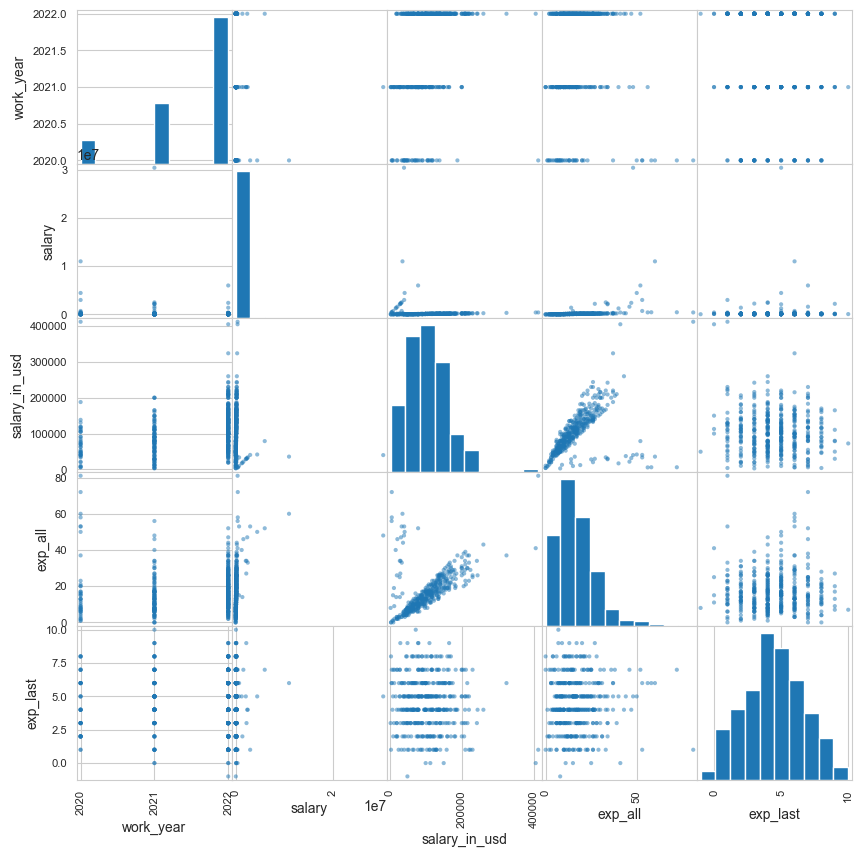

In [55]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))

В ходе анализа матрицы были сделаны следующие выводы:

1. Матрицы с данными salary некорректно отображаются. Также анализ таких данных будет некорректен, поскольку зарплаты выплачиваются в различных валютах, для анализа зарплат будет использоваться salary_in_usd.
2. В течение трех лет (work_year) из года в год зарплаты (salary_in_usd) в целом выросли.
3. В средних случаях зарплата (salary_in_usd) растет равномерно со стажем работы (exp_all). Есть случаи, когда сотрудники с большим количеством опыта получают более низкую зарплату.
4. Заметна тенденция: пиковая зарплата (salary_in_usd) у сотрудников с опытом работы на последней работе (exp_last) до 5 лет растет в зависимости от стажа. Начиная с 5 и до 10 лет опыта - пиковая зарплата сокращается.

### Диаграмма рассеивания по категориям: зависимость зарплаты и стажа работы от типа работы.


<Axes: xlabel='salary_in_usd', ylabel='exp_all'>

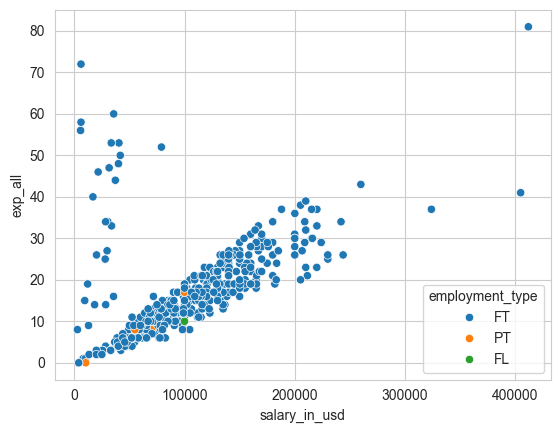

In [56]:
import seaborn as sns
sns.scatterplot(data=df, x='salary_in_usd', y='exp_all', hue='employment_type')

В ходе анализа диаграммы были сделаны следующие выводы:

1. Преимущественный тип работы - Full-time (полный рабочий день).
2. Зарплата сотрудников с типом работы Part-time/Freelance (неполный рабочий день/фриланс) составляет не больше 10000 долларов.
3. Зарплата растет равномерно со стажем работы. Есть случаи, когда сотрудники с большим количеством опыта получают более низкую зарплату.
4. Есть аномалия в виде сотрудника со стажем 80+ лет и зарплатой 400000+ долларов.

### Гистограммы для каждого числового признака

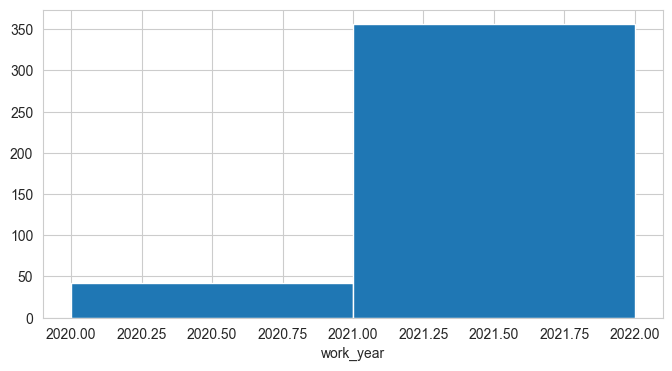

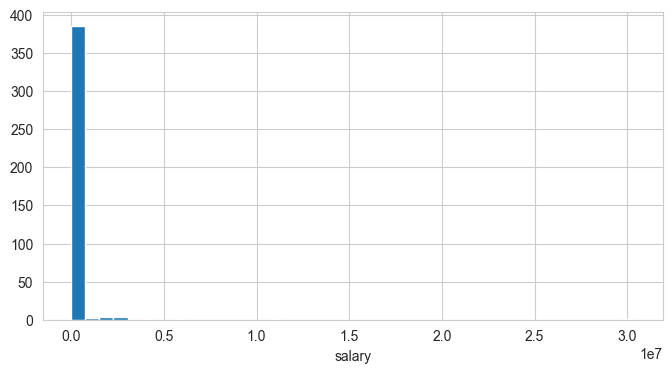

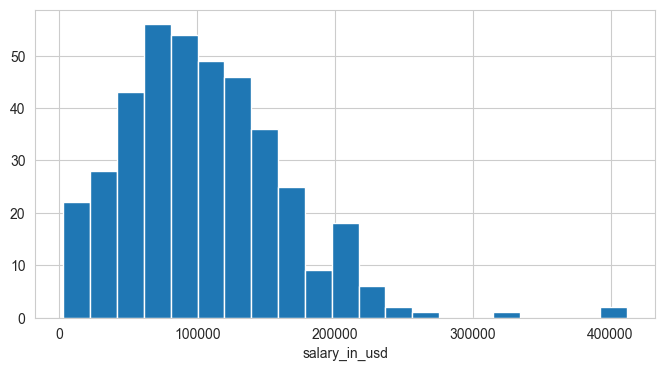

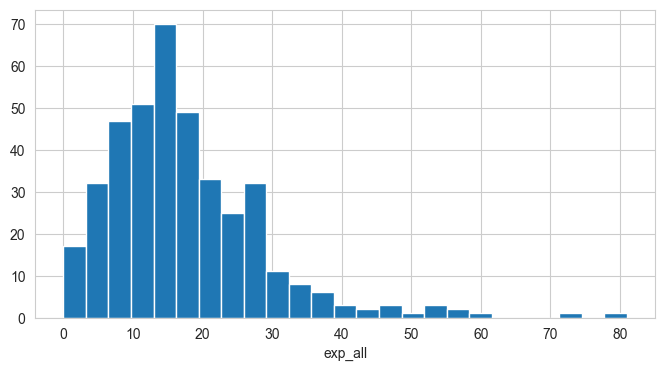

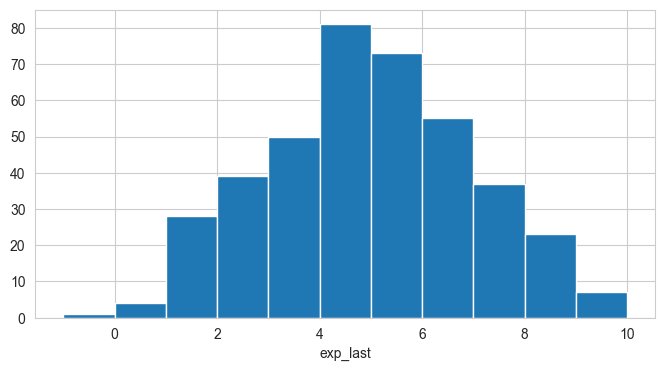

In [57]:
import matplotlib.pyplot as plt

numeric_columns = ['work_year', 'salary', 'salary_in_usd', 'exp_all', 'exp_last']
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    df[column].hist(bins='auto')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

В ходе анализа гистограмм были сделаны следующие выводы:

1. work_year: количество зарплат из года в год выросло. Это может быть связано с увеличением штатов компаний или с появлением новых компаний.
2. salary_in_usd: большая часть сотрудников получает зарплату в районе 10000 долларов. Есть несколько сотрудников с зарплатами 300000+ долларов.
3. exp_all: наибольшее количество сотрудников имеет общий стаж около 15 лет.
4. exp_last: наибольшее количество сотрудников имеет стаж на последней работе около 4 лет.

### Оценка коэффициента корреляции и ковариации

Корреляция – это статистическая мера зависимости между двумя
переменными. Она позволяет определить, насколько две переменные
изменяются вместе, а также направление отношений.

In [58]:
correlation=df[['exp_all', 'work_year', 'salary_in_usd']].corr()
correlation

,exp_all,work_year,salary_in_usd
exp_all,1.000000,0.035532,0.511577
work_year,0.035532,1.000000,0.330406
salary_in_usd,0.511577,0.330406,1.000000


На основе данных массива можно сделать следующие  выводы:

1. Умеренная положительная корреляция между общим стажем работы (exp_all) и зарплатой (salary_in_usd). Это означает, что с повышением опыта работы зарплата, как правило, растет.
2. Умеренная положительная корреляция между годом работы (work_year) и зарплатой (salary_in_usd). Это означает, что зарплаты в течение данного периода стали выше по каким-либо обстоятельствам.
3. Слабая положительная корреляция между годом работы (work_year) и общим стажем (exp_all). Опыт не зависит от года сбора данных.

Text(0.5, 1.0, 'Тепловая карта корреляции')

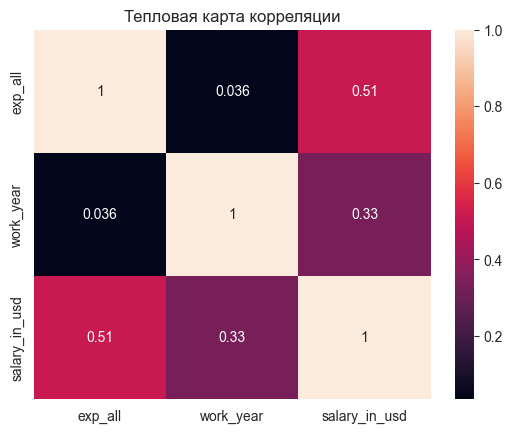

In [59]:
sns.heatmap(correlation, annot=True).set_title('Тепловая карта корреляции')

На основании анализа данных карты можно сделать следующие выводы:

1. Наблюдается умеренная положительная корреляция между общим стажем работы (exp_all) и заработной платой (salary_in_usd). Это свидетельствует о том, что с увеличением опыта работы, как правило, возрастает и уровень зарплаты.
2. Также отмечается умеренная положительная корреляция между количеством лет работы (work_year) и заработной платой (salary_in_usd). Это указывает на то, что в течение данного периода зарплаты, вероятно, возросли по определённым причинам.
3. Наблюдается незначительная положительная корреляция между количеством лет работы (work_year) и общим стажем (exp_all). Опыт не зависит от года, в который были собраны данные.

Ковариация является мерой совместной изменчивости двух случайных величин.

In [60]:
covariation=df[['exp_all', 'work_year', 'salary_in_usd']].cov()
covariation

,exp_all,work_year,salary_in_usd
exp_all,123.979956,0.268794,3.299864e+05
work_year,0.268794,0.461584,1.300415e+04
salary_in_usd,329986.384144,13004.151418,3.355970e+09


На основании анализа данных матрицы можно сделать следующие выводы:

1. Большая положительная ковариация между опытом и зарплатой. Чем больше лет работы, тем зарплата выше.
2. Средняя положительная ковариация между годом и зарплатой. Зарплаты с каждым годом становятся выше.
3. Маленькая положительная ковариация между опытом и годом. Год сбора данных не сильно влияет на распределение опыта.

### Задания по варианту

```Задание 1:``` Использовать seaborn. По группировке - work_year и количество
компаний каждого размера построить диаграмму.

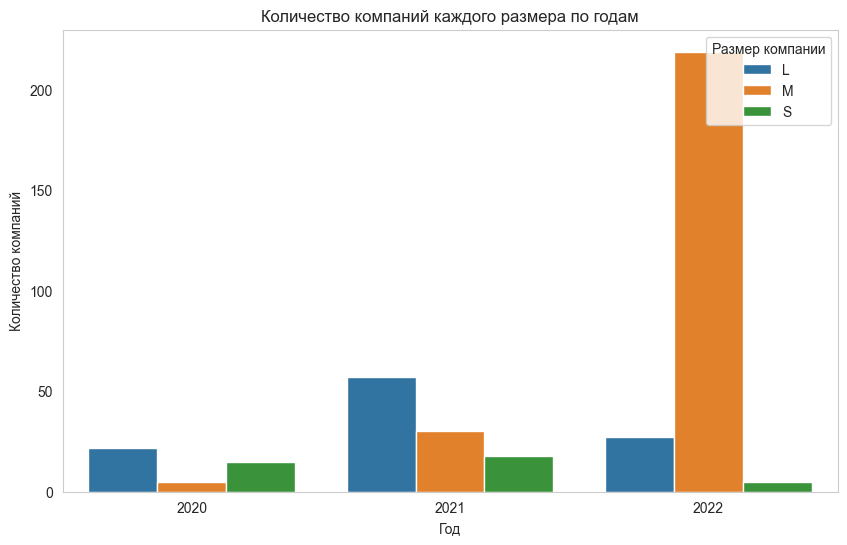

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.countplot(
    data=df,
    x='work_year',
    hue='company_size',
    hue_order=['L', 'M', 'S']  
)

plt.title('Количество компаний каждого размера по годам')
plt.xlabel('Год')
plt.ylabel('Количество компаний')
plt.legend(title='Размер компании', loc='upper right')
plt.grid(axis='y')
plt.show()


```Из данного графика можно сделать следующие выводы:```

1. С 2020 по 2022 годы общее количество компаний, представленных в выборке, увеличивается, особенно заметен резкий рост в 2022 году.
2. В 2020 и 2021 годах преобладали крупные компании (L) — их было значительно больше, чем средних (M) и малых (S).
3. В 2022 году картина кардинально изменилась — средние компании (M) стали доминирующей категорией, их количество резко выросло и существенно превысило долю крупных и малых компаний.
4. Малые компании (S) остаются наименее представленными на всём протяжении периода. Их количество немного колеблется, но остаётся сравнительно низким.

```Задание 2:``` Использовать pandas и plot. По сводной таблице (pivot_table) -
отобразить среднюю зарплату в usd по должностям (job_title). Сделать линию
красной, шириной 6 и отобразить маркеры в виде ●.

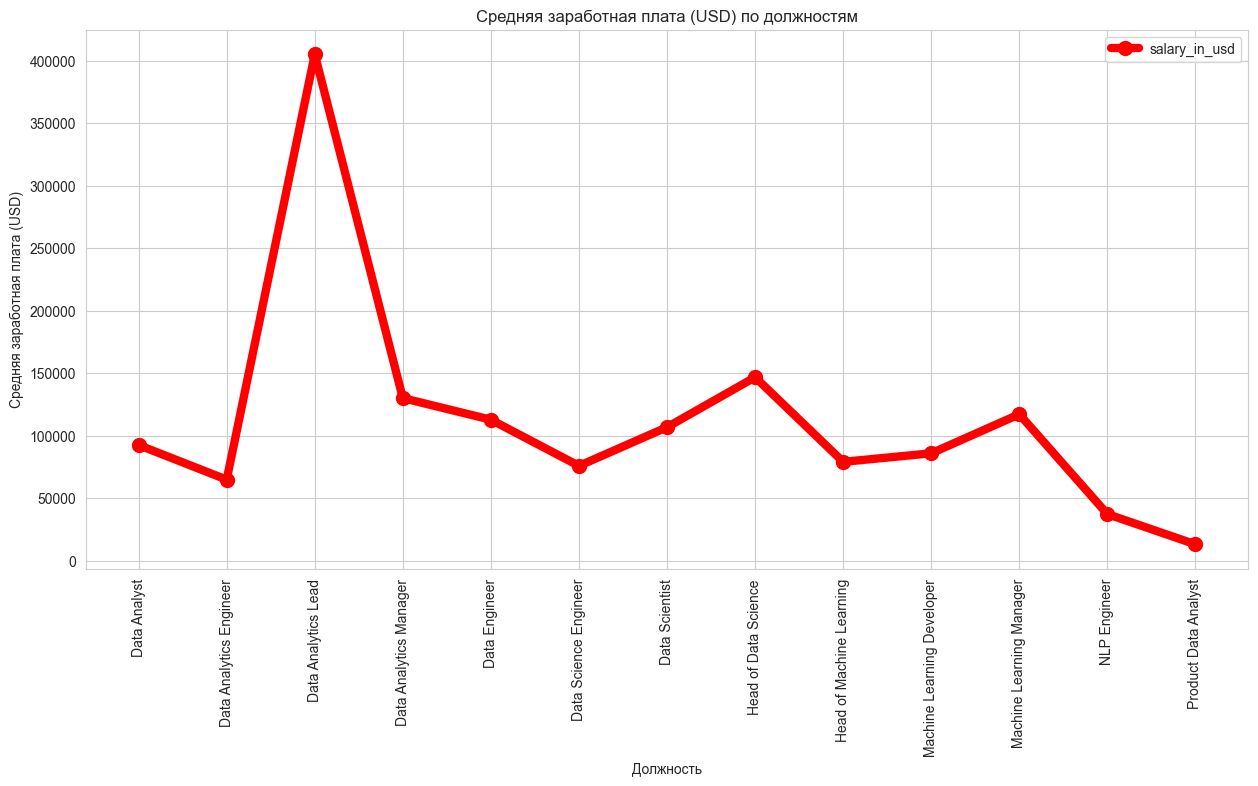

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаём сводную таблицу: средняя зарплата по должностям
pivot_table_salary = df.pivot_table(values='salary_in_usd', index='job_title', aggfunc='mean')

plt.figure(figsize=(15, 7))
pivot_table_salary.plot(
    kind='line',
    color='red',         # красная линия
    linewidth=6,         # ширина линии
    marker='o', 
    markersize=10, 
    legend=True,
    ax=plt.gca()
)

plt.title('Средняя заработная плата (USD) по должностям')
plt.xlabel('Должность')
plt.ylabel('Средняя заработная плата (USD)')
plt.xticks(range(len(pivot_table_salary.index)), pivot_table_salary.index, rotation=90)
plt.grid(True)
plt.show()


```Из данного графика можно сделать следующие выводы:```

1. Наибольшая средняя зарплата наблюдается у должности Data Analytics Lead — более $400 000 в год. 
Это заметный пик на графике, показывающий, что руководящие позиции в аналитике данных значительно превосходят остальные по уровню дохода.
2. Средние по уровню зарплаты должности:
    - Head of Data Science и Machine Learning Manager — от $110 000 до $150 000. 
    Эти позиции также относятся к управленческим или старшим техническим ролям.
    - Data Analytics Manager, Data Engineer, Data Scientist — диапазон $100 000–$130 000.
3. Ниже среднего уровня: Data Analyst, Data Analytics Engineer, Data Science Engineer — зарплата примерно $70 000–$95 000. 
Эти роли чаще связаны с техническим исполнением и анализом, а не с управлением.
4. Cамые низкие показатели: NLP Engineer и Product Data Analyst — $10 000–$40 000.
Это может быть связано с ограниченным количеством данных по этим позициям или географическими факторами (например, сотрудники из стран с более низким уровнем оплаты труда).

```Задание 3:``` Использовать matplotlib. Построить круговую диаграмму, которая
отображает процент компаний каждого размера.

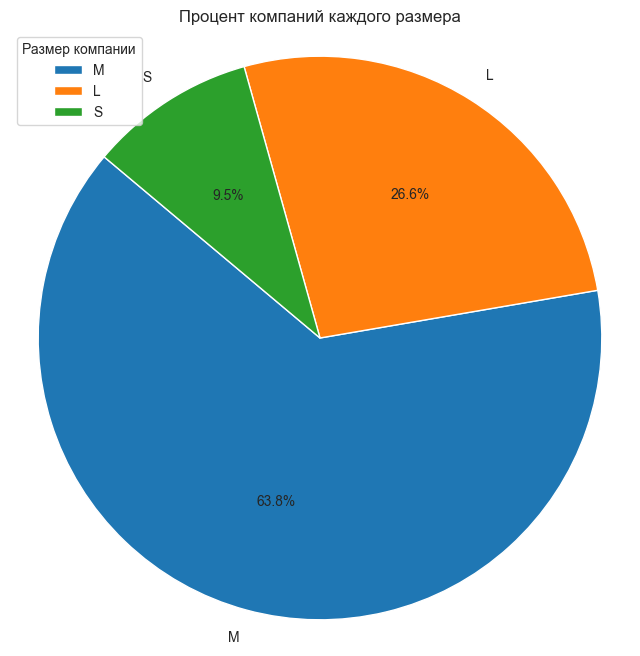

In [73]:
import matplotlib.pyplot as plt

# Подсчитываем количество компаний каждого размера
size_counts = df['company_size'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    size_counts,
    labels=size_counts.index,
    autopct='%1.1f%%',   # показываем проценты
    startangle=140    
)
plt.title('Процент компаний каждого размера')
plt.axis('equal')        # круглая диаграмма
plt.legend(title='Размер компании')
plt.show()


```Из данного графика можно сделать следующие выводы:```

1. Наибольшая доля — средние компании (M):
Это говорит о том, что основная часть выборки приходится именно на компании среднего размера — от 50 до 250 сотрудников.
Такие организации, как правило, активно развиваются и формируют основу рынка труда в сфере данных.

2. Крупные компании (L):
Их доля также заметна, но почти в 2,5 раза меньше, чем у средних компаний.
Это может отражать ограниченное количество крупных корпораций по сравнению с числом средних предприятий.

3. Малые компании (S):
Это может быть связано с тем, что небольшие компании реже участвуют в сборе данных по заработным платам или имеют ограниченные кадровые ресурсы.

### График типа hexagonal binning plot

<Axes: xlabel='exp_all', ylabel='exp_last'>

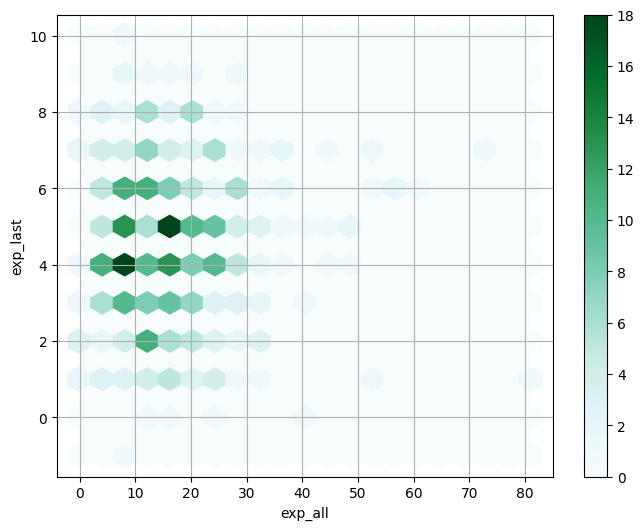

In [ ]:
df.plot(x='exp_all', y='exp_last', kind='hexbin', gridsize=20, grid=True, figsize=(8,6))

Из данного графика можно сделать вывод, что в компаниях есть большое количество сотрудников с общим опытом до 10 лет и опытом прошлой работы в 4 года и с общим опытом работы около 15 лет и опытом прошлой работы в 5 лет.

### График типа boxplot

<Axes: >

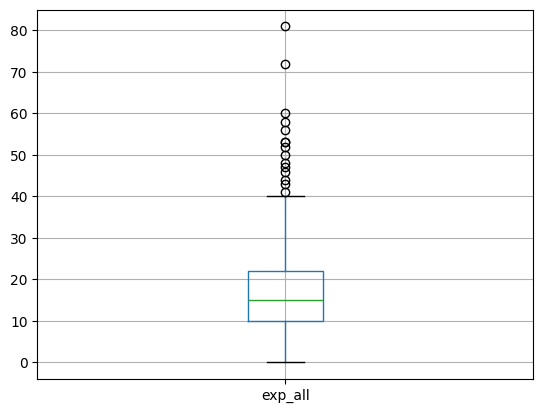

In [ ]:
df.boxplot(column='exp_all')

По данному графику можно сделать следующие выводы:

1. Медианное значение общего опыта находится в районе 15 лет.
2. Нижний квартиль - 10 лет, верхний квартиль - 20+ лет.
3. Минимальное значение опыта соответствует нулю, максимальное - 40. Опыт после 40 лет считается выбросами.

### Boxplot по столбцу salary_in_usd по каждой созданной категории

In [ ]:
categ=['низкий', 'средний', 'высокий']
bins=[0, 20000, 60000, df['salary_in_usd'].max()+1]
df1=df
df1['Category']=pd.cut(df['salary_in_usd'], bins=bins, labels=categ)
df1.head(10)

,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp_last,Category
0,2020,FT,Data Scientist,70000,79833,DE,DE,L,9,4,высокий
1,2020,FT,Product Data Analyst,20000,20000,HN,HN,S,2,2,низкий
2,2020,FT,Data Analyst,72000,72000,US,US,L,13,3,высокий
3,2020,FT,Data Scientist,11000000,35735,HU,HU,L,60,6,средний
4,2020,FT,Data Scientist,45000,51321,FR,FR,S,8,4,средний
5,2020,FT,Data Scientist,3000000,40481,IN,IN,L,53,1,средний
6,2020,FT,Data Scientist,35000,39916,FR,FR,M,6,2,средний
7,2020,FT,Data Analyst,85000,85000,US,US,L,15,2,высокий
8,2020,FT,Data Analyst,8000,8000,PK,PK,L,1,4,низкий
9,2020,FT,Data Engineer,4450000,41689,JP,JP,S,50,5,средний


Данным из таблицы были присвоены категории дохода (низкий, средний, высокий) исходя из данных столбца зарплат в долларах (salary_in_usd).

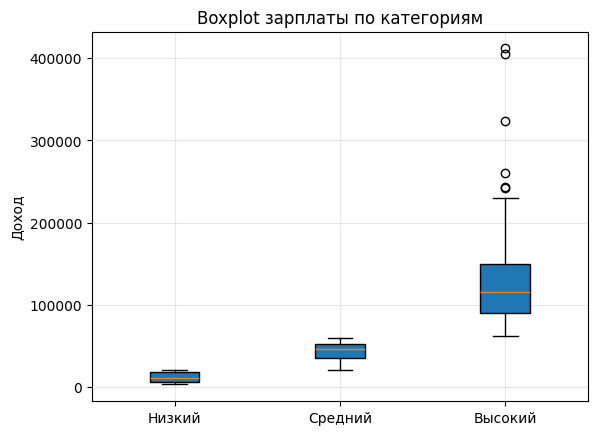

In [ ]:
plt.boxplot([df[df['Category'] == 'низкий']['salary_in_usd'],
                       df[df['Category'] == 'средний']['salary_in_usd'],
                       df[df['Category'] == 'высокий']['salary_in_usd']],
                      tick_labels=['Низкий', 'Средний', 'Высокий'],
                      patch_artist=True)
plt.title('Boxplot зарплаты по категориям')
plt.ylabel('Доход')
plt.grid(True, alpha=0.3)
plt.show()

Из данного графика можно сделать следующие выводы:

1. Для низкого уровня дохода медианное значение находится в районе 20000 долларов. Нижний квартиль находится рядом с минимальным значением, зарплата около 10000. Верхний квартиль недалеко от максимального значения, зарплата около 30000.
2. Для среднего уровня дохода медианное значение находится около 50000 долларов. Нижний квартиль находится в районе 40000, минимальное значение примерно равно 30000. Верхний квартиль примерно равен 60000 и находится рядом с максимальным значением.
3. Для высокого уровня дохода медианное значение на уровне 120000 долларов. Нижний квартиль в районе 90000, минимальное значение - 60000. Верхний квартиль в районе 150000 долларов, максимальное значение в районе 330000 долларов. Данные после этого значения считаются выбросами.

### 2 графика boxplot для других категорий

Text(0.5, 1.0, 'Зависимость зарплаты от размера компании')

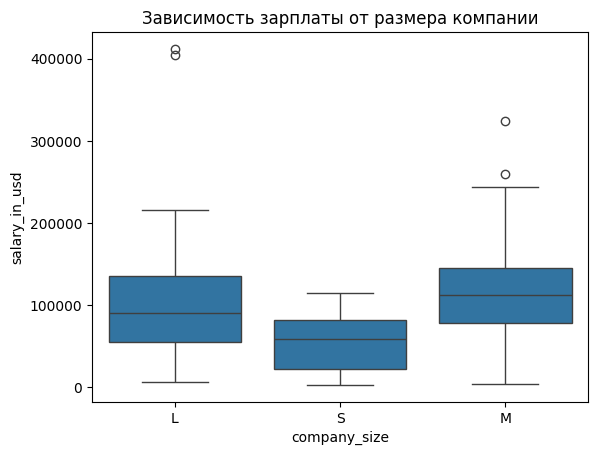

In [ ]:
gr=sns.boxplot(x=df['company_size'], y=df['salary_in_usd'])
gr.set_title('Зависимость зарплаты от размера компании')

Из этого графика можно сделать следующие выводы:

1. Наименьшие зарплаты у небольших компаний, средние и большие компании примерно равны.
2. Значения нижнего квартиля зарплат для среднего уровня компании выше, чем значения для большой.
3. Минимальные значения для каждого типа компаний примерно равны.

In [ ]:
import plotly.express as px
px.box(df, x='employment_type', y='salary_in_usd')

Из данных представленного графика можно сделать следующие выводы:

1. Для сотрудников с полным рабочим днем (FT) медианная зарплата находится в районе 100000 долларов. Нижний квартиль выше 50000, верхний - чуть ниже 150000. Присутствуют выбросы. Минимальное и максимальное значения находятся далеко от бокса.
2. Для сотрудников с неполным рабочим днем (PT) медианная зарплата находится чуть выше 50000 долларов. Нижний квартиль около 20000, верхний - около 70000. Минимальное и максимальное значения находятся недалеко от бокса.
3. Для сотрудников-фрилансеров (FL) медианная зарплата находится в районе 60000 долларов. Нижний квартиль равен минимальному значению - 20000, верхний квартиль равен максимальному - 100000.

### Вывод

В ходе выполнения данной лабораторной работы была изучена связь между признаками двумерного набора данных, а также проделана работа по визуализации данных.

Перед началом работы была проведена предварительная обработка данных, в ходе которой были найдены и удалены дубликаты и пропуски, изменены название столбца и типы данных.

В процессе работы были построены диаграмма рассеивания, матрица диаграмм рассеивания, гистограммы, точечные диаграммы, круговые диаграммы, графики типа hexagonal binning plot, boxplot. Также были изучены библиотеки matplotlib, seaborn, plotly.

Были изучены понятия ковариация и корреляция, была построена тепловая карта корреляции. Графики были проанализированы, по ним сделаны соответствующие выводы. Некоторые данные было невозможно проанализировать из-за проблем с датасетом.
